In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
women = train_data.loc[train_data['Sex'] == 'female']['Survived']
print("Women: ", sum(women)/len(women)*100)
men = train_data.loc[train_data['Sex'] == 'male']['Survived']
print("Men: ", sum(men)/len(men)*100)

Women:  74.20382165605095
Men:  18.890814558058924


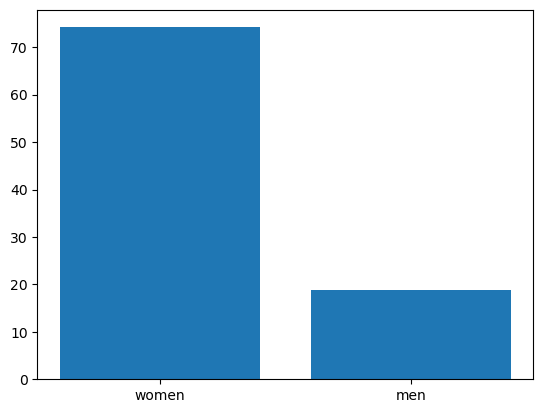

In [6]:
import matplotlib.pyplot as plt


x = np.array(["women","men"])
y = np.array([74.20382165605095,18.890814558058924])

plt.bar(x,y)
plt.show()

In [7]:
# Embarked

southampton = train_data.loc[train_data['Embarked'] == 'S']['Survived']
print("Southampton: ", sum(southampton)/len(southampton)*100)
cherbourg = train_data.loc[train_data['Embarked'] == 'C']['Survived']
print("Cherbourg: ", sum(cherbourg)/len(cherbourg)*100)
queenstown = train_data.loc[train_data['Embarked'] == 'Q']['Survived']
print("Queenstown: ", sum(queenstown)/len(queenstown)*100)

Southampton:  33.69565217391305
Cherbourg:  55.35714285714286
Queenstown:  38.961038961038966


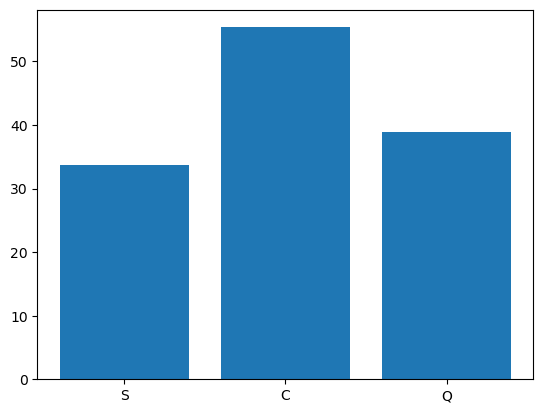

In [8]:
x = np.array(["S","C","Q"])
y = np.array([33.69565217391305,55.35714285714286,38.961038961038966])

plt.bar(x,y)
plt.show()

In [9]:
# Pclass

class_1 = train_data.loc[train_data['Pclass'] == 1]['Survived']
print("Class 1: ", sum(class_1)/len(class_1)*100)
class_2 = train_data.loc[train_data['Pclass'] == 2]['Survived']
print("Class 2: ", sum(class_2)/len(class_2)*100)
class_3 = train_data.loc[train_data['Pclass'] == 3]['Survived']
print("Class 3: ", sum(class_3)/len(class_3)*100)

Class 1:  62.96296296296296
Class 2:  47.28260869565217
Class 3:  24.236252545824847


In [10]:
train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)
test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [11]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])

In [13]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


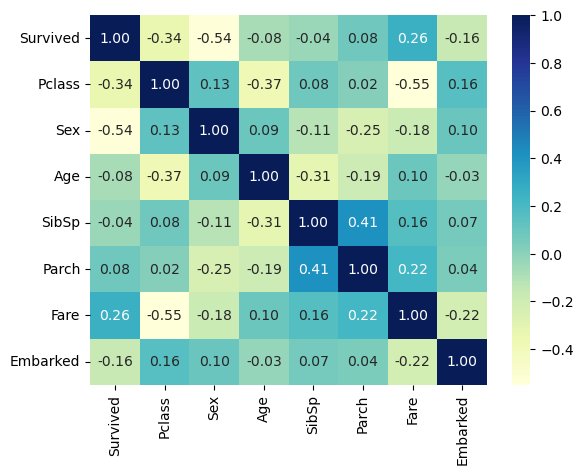

In [15]:
sns.heatmap(train_data.corr(),cmap="YlGnBu",annot=True, fmt='.2f')
plt.show()

In [16]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [17]:
train_data.dropna(inplace=True)

In [18]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
train_data.shape

(714, 8)

In [20]:
x = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']]
y = train_data['Survived']

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train random forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8111888111888111
